<a href="https://colab.research.google.com/github/DSSon/-Encore-Machine_Learning/blob/main/7%EC%A1%B0_Machine_Learning_From_Hell_(MLFH).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. 수치 예측 문제
제목 : Bike Sharing Demand
설명 : 워싱턴 D.C의 자전거 무인 대여 시스템 과거 기록을 기반으로 향후 자전거 대여 수요를 예측
링크 : https://www.kaggle.com/c/bike-sharing-demand
문제 유형 : 수치 예측


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
test_data= pd.read_csv('/content/bike_sharing_test.csv')
train_data = pd.read_csv('/content/bike_sharing_train.csv')

In [ ]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


- datetime : 시간별 날짜
- season : 1=봄, 2=여름, 3=가을, 4=겨울
- holiday : 하루가 류일로 간주되는지 여부
- workingday : 주말과 휴일이 아닌 일하는 날
- weather : 
            1: 맑음,구름 조금,흐림
            2: 안개+흐림, 안개+구름, 안개+ 구름이 거의 없음 + 흐림
            3: 가벼운 눈, 가벼운 비 + 천둥+ 구름, 가벼운 비 + 구름
            4: 폭우 + 우박 + 천둥 + 안개, 눈 + 안개
- temp : 섭씨온도
- atemp : 섭씨 온도의 느낌
- humidity : 상대 습도
- windspeed : 풍속
- casual : 미등록 사용자 대여수
- registered : 등록된 사용자 대여수
- count : 총 대여수

In [11]:
train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f050cf4ff90>,
      dtype=object)

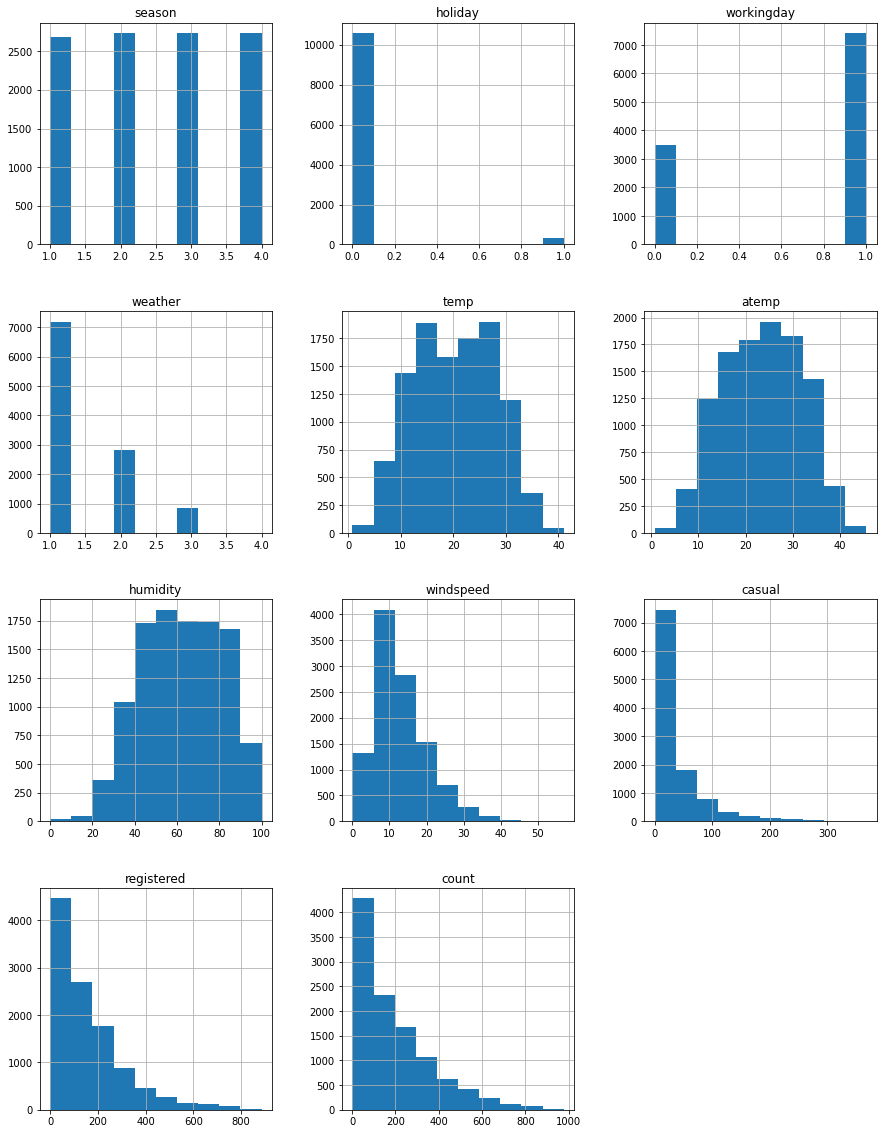

In [12]:
train_data.hist(figsize=(15,20))